In [1]:
import django
import os
import pandas as pd
import numpy as np
import html
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 90.

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "nanotud.settings")

'nanotud.settings'

In [2]:
from django.core.wsgi import get_wsgi_application
application = get_wsgi_application()
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

/Users/robertb/opt/anaconda3/lib/python3.8/site-packages/django/db/models/base.py:321: RuntimeWarning: Model 'internal.cv' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_model(new_class._meta.app_label, new_class)


In [3]:
from research.models import Publication

In [20]:
df_chair = pd.DataFrame(list(Publication.objects.filter(approved=True).filter(chair_pub=True).values()))
df_chair['pub_date']= pd.to_datetime(df_chair['pub_date'])

In [8]:
df_no_chair= pd.DataFrame(list(Publication.objects.filter(approved=True).filter(chair_pub=False).values()))


In [21]:
df_chair.pub_date

0     2022-04-23
1     2022-02-14
2     2022-02-10
3     2022-01-21
4     2022-01-05
         ...    
486   1999-12-01
487   1998-12-01
488   1997-12-01
489   1997-12-01
490   1996-12-01
Name: pub_date, Length: 491, dtype: datetime64[ns]

Text(0, 0.5, 'number')

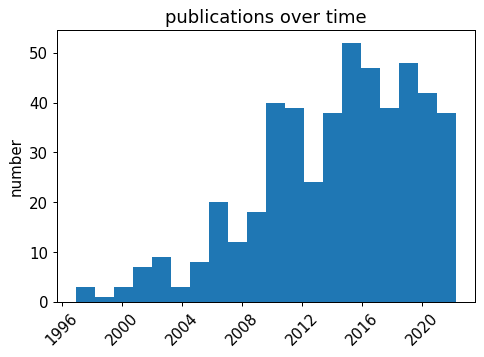

In [22]:
df_chair['pub_date'].hist(bins=20, xrot=45,grid=False)
plt.title('publications over time')
plt.ylabel('number')

Text(0.5, 0, 'date')

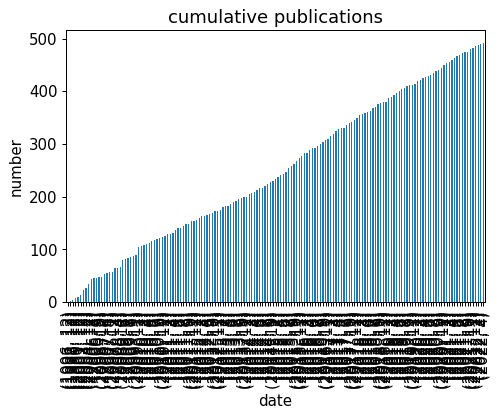

In [27]:
df_chair['pub_date'].sort_values().groupby([df_chair["pub_date"].dt.year, df_chair["pub_date"].dt.month]).count().cumsum().plot(kind='bar')
plt.title('cumulative publications')
plt.ylabel('number')
plt.xlabel('date')

In [28]:
from internal.models import Member

In [29]:
member = pd.DataFrame(list(Member.objects.values()))

In [56]:
member.status_id

0      20
1      12
2      14
3      18
4       9
       ..
367    19
368    10
369    19
370     8
371    19
Name: status_id, Length: 372, dtype: int64

In [58]:
member.active

0       True
1       True
2       True
3       True
4       True
       ...  
367    False
368    False
369    False
370    False
371    False
Name: active, Length: 372, dtype: bool

In [51]:
gender = pd.DataFrame({   '': [member['gender_id'].value_counts()[2], member['gender_id'].value_counts()[1]]},
                  index=['male', 'female'])
gender.plot(kind='pie', subplots=True,autopct='%1.f%%');
plt.title('Gender');

KeyError: 1

In [ ]:
anzahl = len(Member.objects.filter())

nachwuchs_pub=[]
female_pub = []

all_member = pd.DataFrame(list(Member.objects.values()))
for i in range(anzahl):
    all_authors = all_pubs[i].author.all().values()
    number_authors = len(list(all_authors))
    nachwuchs=0
    female=0
    for j in range(number_authors):
        print (i,j)
        if all_authors[j]['nachwuchs']:
            nachwuchs += 1
        if all_authors[j]['gender_id']==1:
            female += 1
    
    nachwuchs_pub.append(nachwuchs)
    female_pub.append(female)
df['nachwuchs']=nachwuchs_pub
df['female']=female_pub
            